<a href="https://colab.research.google.com/github/PL-V/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


url = 'https://raw.githubusercontent.com/PL-V/Titanic/main/train.csv'
df = pd.read_csv(url)

df.sample(10,random_state=0)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3582,3582,1,1,"Kepner, Yuonne",female,48.0,0,0,PC 194346,126.25,C8362,C
60498,60498,0,3,"Parker, Jimmie",male,27.0,0,0,A/5. 27947,9.45,NaN,S
53227,53227,0,1,"Grimm, Maribel",female,40.0,0,0,10680,125.63,B15452,C
21333,21333,0,3,"Guzman, Jason",male,6.0,0,0,NaN,8.43,NaN,S
3885,3885,1,1,"Harding, Lillian",female,48.0,1,2,14367,NaN,B7243,C
51521,51521,1,3,"Burrell, Sharon",female,4.0,1,2,NaN,34.29,NaN,S
84261,84261,0,3,"Ryan, Jason",male,33.0,0,0,43117,10.69,NaN,S
10685,10685,1,1,"Dupes, Cheryl",female,NaN,0,0,440464,29.77,C19582,S
59948,59948,1,1,"Johnson, Beverly",female,52.0,0,0,PC 221931,83.89,C12295,C
41032,41032,0,1,"Testa, Kevin",male,39.0,0,1,27537,77.72,B13535,S


In [19]:
df.groupby('Sex').Survived.mean()

Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64

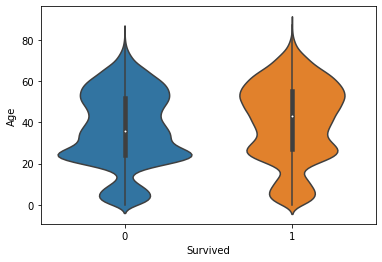

In [23]:
import seaborn as sns
df.groupby('Age').Survived.mean()
sns.violinplot(x='Survived',y='Age',data=df)

In [30]:
df.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.579779
2,0.525018
3,0.247305


In [29]:
df[df.Parch > 0 ].Survived.mean()

0.49036281179138325

In [27]:
df[df.Parch == 0].Survived.mean()

0.40520805004079413

In [31]:
df.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.751296
Q,0.596976
S,0.315294


In [35]:
df['CabinPrefix'] = df.Cabin.apply(lambda x:x[0] if not pd.isna(x) else x)

In [41]:
df.groupby('CabinPrefix').Survived.agg(['count','mean'])

,count,mean
CabinPrefix,,
A,6307,0.274616
B,7439,0.630192
C,11825,0.712220
D,3637,0.732197
E,1749,0.617496
F,663,0.837104
G,482,0.836100
T,32,0.437500


In [43]:
df['FamilyName'] = df.Name.apply(lambda x : x.split(',')[0])
df['FirstName'] = df.Name.apply(lambda x : x.split(',')[1])

t_df = df.groupby('FamilyName').Survived.agg(['count', 'mean']).sort_values('count', ascending=False)
t_df[(t_df['count'] > 1) & (t_df['count'] < 10)]

,count,mean
FamilyName,,
Clemens,9,0.666667
Louis,9,0.333333
Toney,9,0.555556
Clement,9,0.333333
Kenny,9,0.555556
...,...,...
Grothe,2,0.000000
Cerrone,2,0.500000
States,2,0.000000


In [44]:
t_df = df.groupby('Ticket').Survived.agg(['count', 'mean']).sort_values('count', ascending=False)
t_df

,count,mean
Ticket,,
A/5,602,0.363787
C.A.,177,0.389831
SC/PARIS,145,0.448276
SOTON/O.Q.,80,0.337500
SC,57,0.491228
...,...,...
402718,1,1.000000
4027198,1,0.000000
4027354,1,0.000000


In [45]:
import re
def extract_ticket_prefix(ticket):
    if pd.isna(ticket):
        return ticket
    first_digit_search = re.search(r'\d', ticket)
    if first_digit_search:
        return ticket[:first_digit_search.span()[0]].strip()
    return None

def preprocess_dataframe(df):
    df = df.copy()
    df['CabinLetter'] = df.Cabin.apply(lambda v : v if pd.isna(v) else v[0])
    df['FamilyId'] = df.Name.str.lower().str.split(', ').str[0] + df.CabinLetter + df.Embarked + df.Pclass.astype(str)
    df['TicketPrefix'] = df.Ticket.apply(extract_ticket_prefix)
    df['FirstName'] = df.Name.str.split(' ').apply(lambda vs : vs[1].lower())
    df['Pclass'] = df['Pclass'].astype(str)
    return df

df = pd.read_csv('https://raw.githubusercontent.com/PL-V/Titanic/main/train.csv')
df = preprocess_dataframe(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,FamilyId,TicketPrefix,FirstName
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,C,oconnorCS1,,frankie
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN,NaN,,drew
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,NaN,NaN,CA,kenneth
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,NaN,NaN,A.,james
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,NaN,NaN,,michael
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S,NaN,NaN,,jonathan
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S,NaN,NaN,A/,jose
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S,NaN,NaN,,linda
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,A,wardlawAS1,,michael
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C,D,greigoDC2,,rudy


In [46]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,FamilyId,TicketPrefix,FirstName
38290,38290,1,2,"Davis, Jennifer",female,42.0,0,1,11752,23.13,NaN,S,NaN,NaN,,jennifer
30419,30419,1,3,"Luckett, Dolly",female,21.0,0,0,NaN,8.16,NaN,S,NaN,NaN,NaN,dolly
72547,72547,0,2,"Murray, Willie",male,68.0,2,1,9419,24.26,NaN,C,NaN,NaN,,willie
41211,41211,0,1,"Nassar, Corey",male,28.0,0,0,314229,6.47,C2629,S,C,nassarCS1,,corey
36470,36470,1,2,"Grisham, Edna",female,36.0,0,0,14537,22.45,NaN,S,NaN,NaN,,edna


In [47]:
df_test.shape

(25000, 16)

In [48]:
NUMERIC_FEATURES = ['Age', 'SibSp', 'Parch', 'Fare']
num_df = df_train[NUMERIC_FEATURES].copy()
num_df.loc[num_df['Age'].isna(), 'Age'] = num_df['Age'].mean()
num_df

,Age,SibSp,Parch,Fare
2606,38.407101,0,0,29.45
57228,32.000000,0,0,594.89
8382,41.000000,2,1,61.83
60281,52.000000,0,0,31.26
48432,23.000000,0,0,6.57
...,...,...,...,...
21243,70.000000,0,0,10.74
45891,61.000000,1,2,66.32
42613,34.000000,2,2,27.76
43567,22.000000,2,0,231.10


In [49]:
from sklearn.preprocessing import OneHotEncoder

CATEGORICAL_FEATURES = ['Pclass', 'Sex', 'Embarked', 'CabinLetter']
cat_df = df_train[CATEGORICAL_FEATURES].copy()
cat_df

,Pclass,Sex,Embarked,CabinLetter
2606,3,male,Q,NaN
57228,1,female,C,C
8382,1,male,S,NaN
60281,1,male,S,NaN
48432,2,male,S,NaN
...,...,...,...,...
21243,3,female,C,NaN
45891,1,female,S,A
42613,3,male,S,NaN
43567,1,male,C,C


In [50]:
one_hot_encoder = OneHotEncoder(drop='first')
cat_features = one_hot_encoder.fit_transform(cat_df).todense()
pd.DataFrame(cat_features, columns=one_hot_encoder.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_2,x0_3,x1_male,x2_Q,x2_S,x2_nan,x3_B,x3_C,x3_D,x3_E,x3_F,x3_G,x3_T,x3_nan
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74997,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scaled_df

NameError: ignored

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)


def fit_transformers(df_train):
    one_hot_encoder = OneHotEncoder(drop='first')
    one_hot_encoder.fit(df_train[CATEGORICAL_FEATURES])
    scaler = StandardScaler()
    scaler.fit(compute_features(df_train, one_hot_encoder, scaler=None))
    return scaler, one_hot_encoder

def compute_features(df, one_hot_encoder, scaler):
    df = preprocess_dataframe(df)
    cat_features = one_hot_encoder.transform(df[CATEGORICAL_FEATURES])
    cat_df = pd.DataFrame(cat_features.todense(), columns=one_hot_encoder.get_feature_names()).reset_index(drop=True)
    num_df = df[NUMERIC_FEATURES].reset_index(drop=True)
    num_df['Age'] = num_df['Age'].fillna(38.0)
    num_df['Fare'] = num_df['Fare'].fillna(44)
    features = pd.concat([num_df, cat_df], axis=1)
    if scaler:
        features = pd.DataFrame(scaler.transform(features), columns=features.columns)
    return features

scaler, one_hot_encoder = fit_transformers(df_train)

X_train = compute_features(df_train, one_hot_encoder, scaler)
y_train = df_train.Survived

X_test = compute_features(df_test, one_hot_encoder, scaler)
y_test = df_test.Survived
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

model = XGBClassifier()
baseline = DummyClassifier(strategy='most_frequent')

model.fit(X_train, y_train)
baseline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


DummyClassifier(strategy='most_frequent')

In [53]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     14269
           1       0.75      0.72      0.73     10731

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



In [55]:
sub_train_df = pd.read_csv('https://raw.githubusercontent.com/PL-V/Titanic/main/train.csv')
sub_train_df = preprocess_dataframe(sub_train_df)
scaler, one_hot_encoder = fit_transformers(sub_train_df)

X_train = compute_features(sub_train_df, one_hot_encoder, scaler)
y_train = sub_train_df.Survived

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


XGBClassifier()

In [57]:
# Run inference on the test dataset and create a submission.
sub_test_df = pd.read_csv('https://raw.githubusercontent.com/PL-V/Titanic/main/test.csv')
X_test = compute_features(sub_test_df, one_hot_encoder, scaler)

submission_df = sub_test_df[['PassengerId']].copy()
submission_df['Survived'] = model.predict(X_test)
submission_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,PassengerId,Survived
0,100000,0
1,100001,0
2,100002,1
3,100003,0
4,100004,1
5,100005,0
6,100006,1
7,100007,0
8,100008,0
9,100009,0


In [58]:
submission_df.to_csv('submission.csv', index=False)


In [59]:
submission_df


,PassengerId,Survived
0,100000,0
1,100001,0
2,100002,1
3,100003,0
4,100004,1
...,...,...
99995,199995,1
99996,199996,0
99997,199997,0
99998,199998,1


In [60]:
!ls


sample_data  submission.csv
